# Modulación AM 
Este experimento cubre la normal Modulación AM y la demodulación en el tiempo y en el dominio de la frecuencia

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

## Introducción: Modulación AM

Con la necesidad de lograr transmitir las señales principalmente de sonido a distintos lugares, surge la modulación AM la cual es una técnica utilizada en los sistemas de comunicación a tráves de un canal Coto & Rojas (2023). Por lo cual, se requiere tanto de una señal mensaje siendo esta la que va a transmitir la información que deseamos enviar y una señal portadora que va a ser el canal por el que la información va a pasar logrando tener un mayor alcance. 

En esta sección produciremos la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ para representar la señal AM en los dominios de tiempo y la frecuencia, y estudiar el efecto de cambiar cualquiera de los parámetros involucrados.

La señal de mensaje será $m(t)=A_m cos(2 \pi f_mt)$ y la portadora $c(t)=A_c cos(2 \pi f_ct)$. Luego se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en el dominio del tiempo.


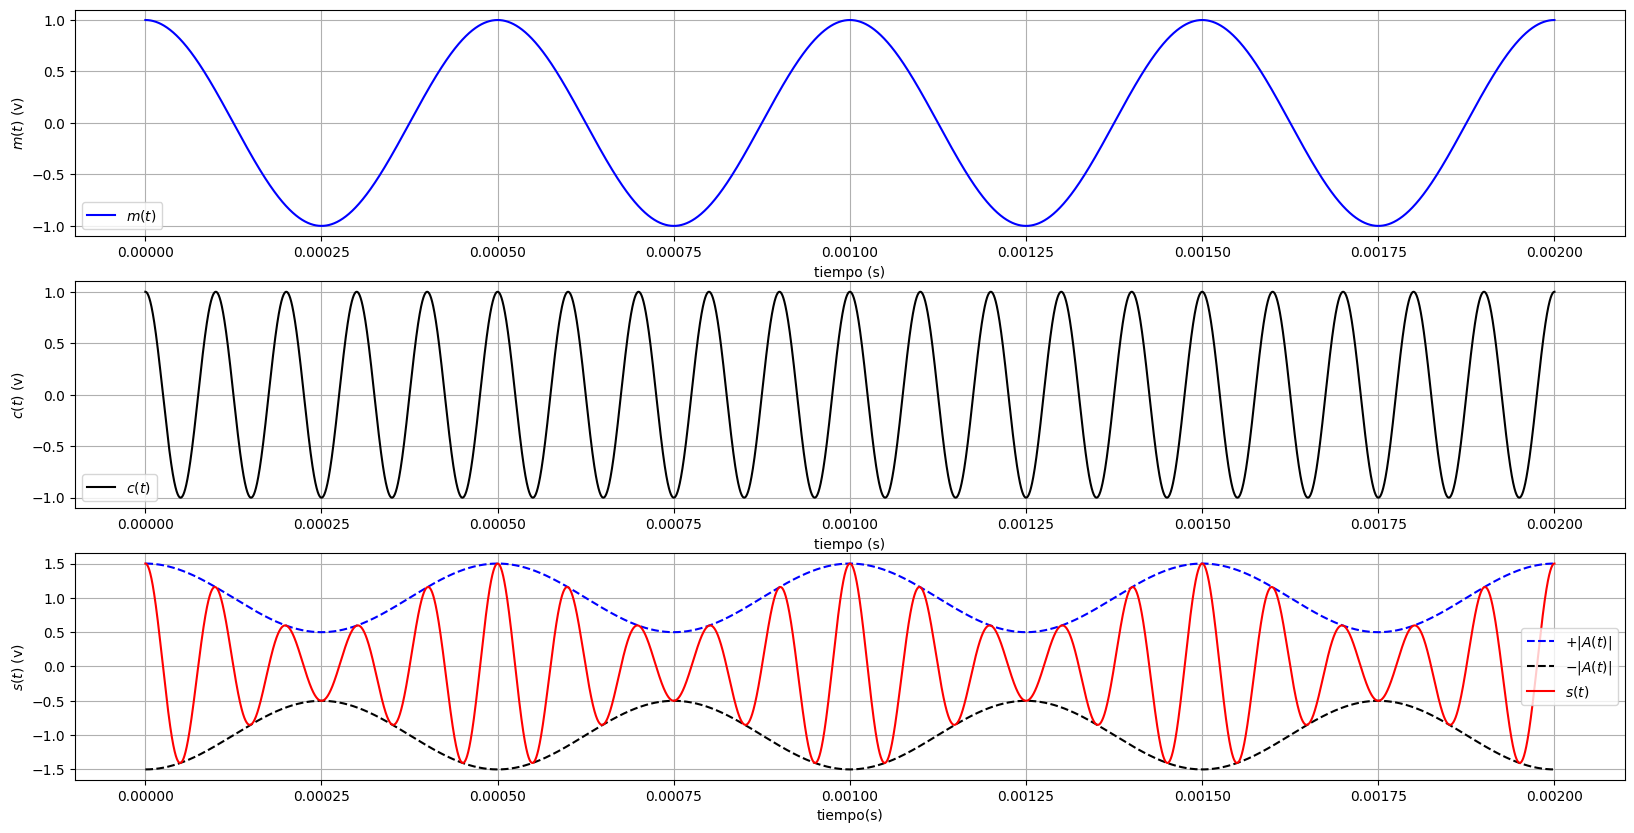

In [3]:
Am=1# Amplitud de la señal mensaje
fm=2000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud.


## -- No es necesario modificar el código siguiente
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo(s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)


## Parámetros involucrados en la modulación AM


Observemos la señal de mensaje $m(t)=A_ccos(2 \pi f_mt)$, la portadora $c(t)=A_ccos(2 \pi f_ct)$, y la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en los dominios del tiempo y de la frecuencia.

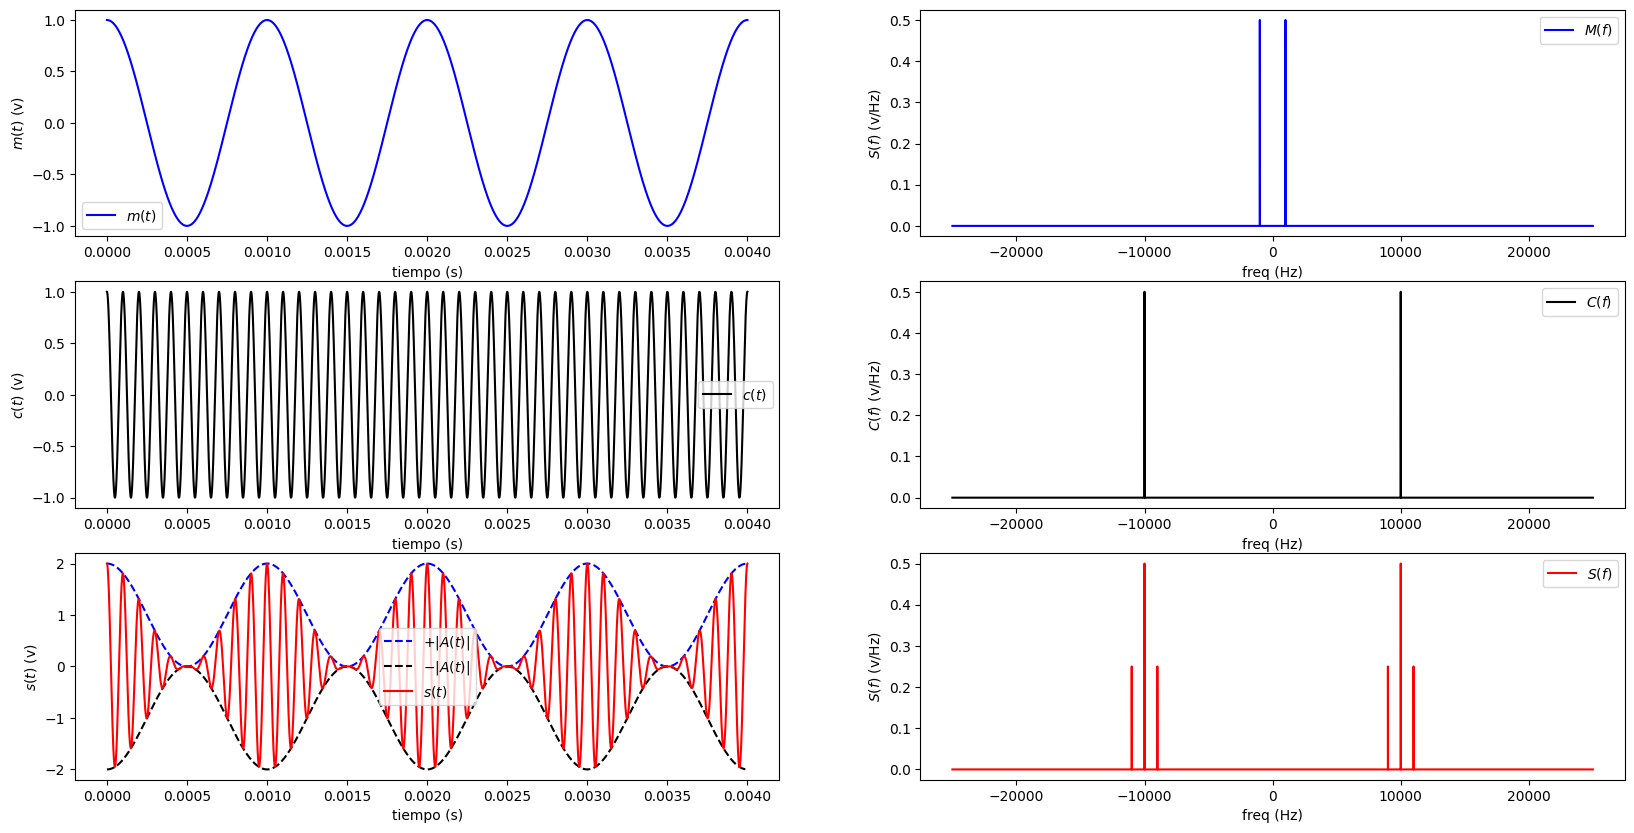

In [4]:
Am=1 #Amplitud de la señal mensaje
fm=1000# Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=1 # Parámetro de sensibilidad de la amplitud


## -- No es necesario modificar el código a partir de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo (s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


### Amplitud de la señal mensaje
Cuando se disminuyé la amplitud del mensaje, la señal modulada recibe mayor información por lo que su amplitud es mayor y más constante en el tiempo, como se puede observar en el siguiente gráfico con una amplitud de *0.5*. 

<img src="AM mayor.png" />


A diferencia de cuando aumenta la amplitud de del mensaje porque la modulada se secciona, entonces por tiempos se obtiene amplitudes menores y en otros amplitudes mayores, dejando pasar ciertas partes de la información enviada visto con una amplitud de *2*.

<img src="AM menor.png" />

Por lo cual se puede determinar que al modificar la amplitud de la señal mensaje interfiere en la cantidad de información que se deja pasar. La amplitud del espectro de la señal mensaje resulta ser la mitad de la amplitud de la señal esto debido a la fórmula de euler de la cual resulta el coseno, viendose afectada en la señal modulada siendo los impulsos laterales observados a la par del impulso de la portadora, por lo cual la amplitud máxima no se ve afectada por la modificación de la amplitud en el mensaje.

### Frecuencia de la señal mensaje 
Para el caso de la frecuencia cuanto mayor es la misma en la señal mensaje es mucho mayor el tiempo entre cada onda por lo cual las ondas coseno resultan más separadas en distintos momentos. Como en el siguiente caso con una frecuencia de *2000 Hz*.

 <img src="FM mayor.png" /> 

Cuando la frecuencia de la señal mensaje es menor el periodo entre cada máximo es mayor resultando dentro de la señal modulada ese mismo comportamiento en donde se puede observar con *500 Hz* la variación entre la cantidad de ondas presentes a diferencia del caso anterior. La distancia entre los impulsos del espectro es menor. 

<img src="FM menor.png" /> 

### Amplitud de la señal portadora
En el caso de la señal portadora al modificar la amplitud no se logra determinar una gran desigualdad en la forma de la señal modulada, solo se puede observar una pequeña variación en la amplitud sin resultar con mayor efecto en la misma. El espectro si se ve mayormente modificado debido a que el impulso mayor del espectro de la modulada corresponde a la señal portadora por lo cual la diferencia entre las amplitudes es más notoria. 
* Amplitud de *2*

<img src="AC mayor.png" /> 

* Amplitud de *0.5*

<img src="AC menor.png" /> 


### Frecuencia de la señal portadora 
En la señal portadora cuando se presenta una frecuencia mayor el período entre los valores máximos resulta ser menor por lo cual aumenta la cantidad de cosenos resultante tanto en la señal portadora como en la modulada y para menores frecuencias resultan períodos mayores con menor cantidad de ondas coseno. Sin embargo, en los espectros solo modifica la posición donde se van a colocar los mismos en el caso de la portadora y la modulada, ya que debido a su fórmula estos se ubican en la frecuencia presentada.
* Frecuencia mayor de *20000 Hz*

<img src="FC mayor.png" />

* Frecuencia menor de *5000 Hz*

<img src="FC menor.png" /> 

### Parámetro de sensibilidad de la amplitud 
Como lo menciona su nombre, este afecta directamente la amplitud de la señal modulada, provando que los mínimos de la onda que bordea la señal sean modificados. 
* En *0.1* como la sensibilidad es menor los mínimos presentan una amplitud mayor

<img src="KA menor.png" /> 

* En *1* con mayor sensibilidad los minímos son de menor amplitud

<img src="KA mayor.png" /> 

## Efecto de cambiar el índice de modulación $\mu$

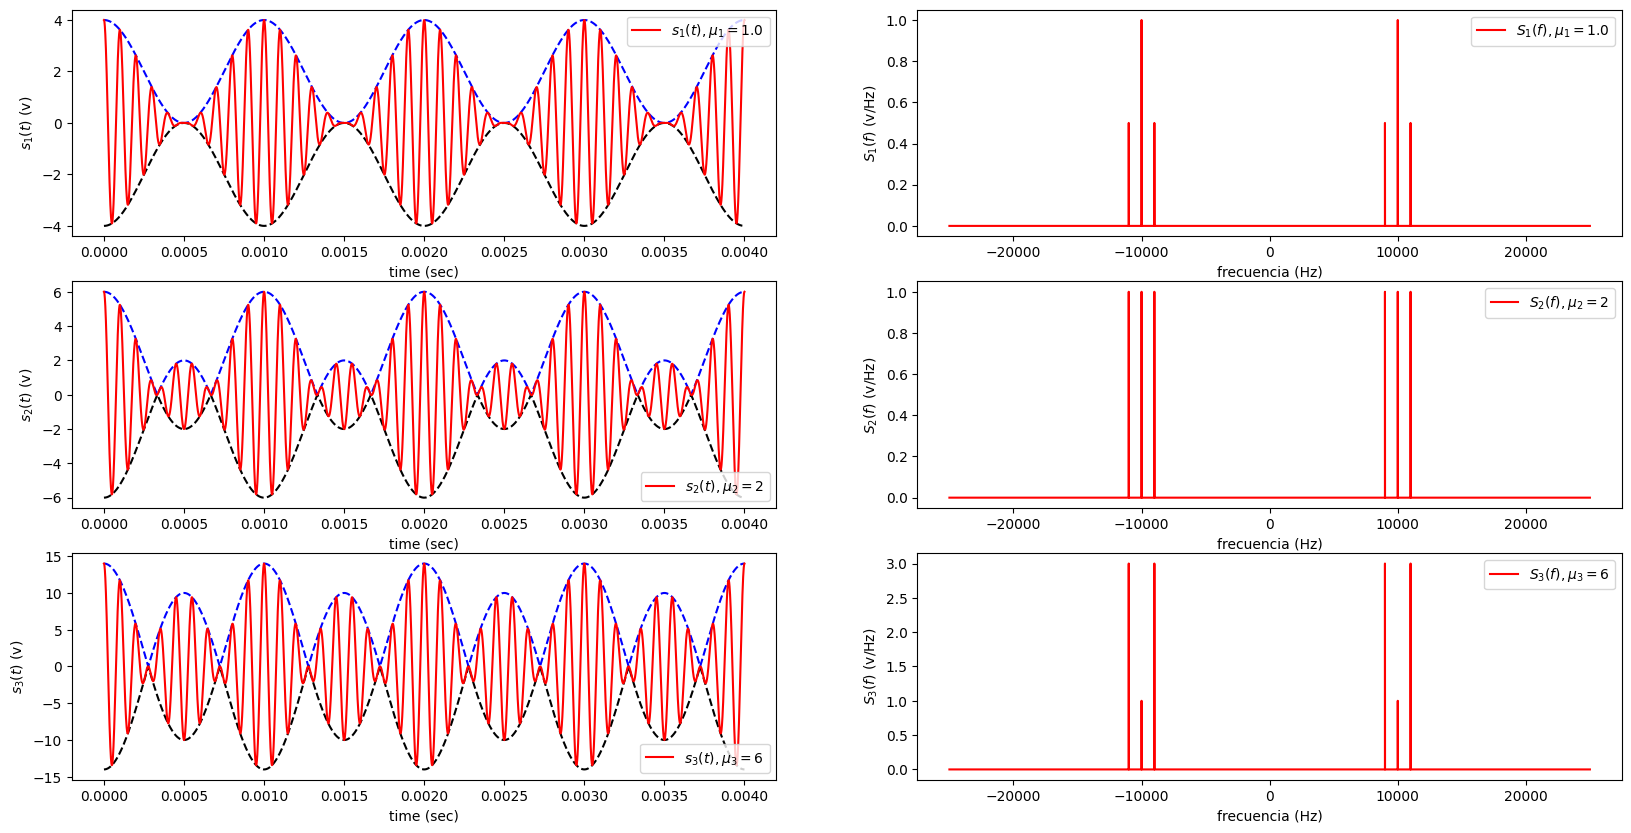

In [5]:
Am1=0.5 # Amplitud de la señal de mensaje 1
Am2=1 # Amplitud de la señal de mensaje 2
Am3=3 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=2 # Parámetro de sensibilidad de amplitud

## -- No es necesario modificar el código después de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Gráficas de las señales
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('frecuencia (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

### Amplitudes de las señales mensaje 
Al tener distintas señales mensaje cuando se modifican las amplitudes ocurre lo mismo que en el caso de una sola señal mensaje.
* Amplitud mayor 

<img src="AMs mayor.png" /> 

Se puede observar que las señales se dividieron por partes en las cuales algunas tienen amplitudes mayores y otras secciones menores, se utilizó una amplitud de *1* para el primer mensaje, *4* para el segundo y *6* para el último mensaje. Dado que la modificación no ocurrió en la señal portadora el espectro se vio afectado solamente en el espectro del coseno al que se multiplica la señal.

* Amplitud menor 

<img src="AMs menor.png" /> 

En este caso se usaron una amplitud de *0.25* para el primer mensaje, *1* para el segundo y *1.5* para el tercero, se determina como los puntos mínimos de la señal son modificados y en este caso entre menor sea el índice de modulación más cercanos son a los puntos máximos. La amplitud máxima de los espectros de la señal mensaje es *1/2* la amplitud de la señal, en este caso el espectro del mensaje resultó ser mayor al del espectro del filtrado. 


### Parámetro de sensibilidad de la amplitud 
Al modificar a una sensibilidad de *5* el índice de modulación se ve aumentando para las tres señales mensaje. Además, con mayor sensibilidad la información del mensaje resulta seccionada tal como en una amplitud menor 

<img src="KA 5.png" />

Luego, con una sensibilidad de *0.5* el índice de modulación es disminuido tanto para la señal como para su espectro. 

<img src="KA 0.5.png" />

Dado que el índice de modulación indica la variación del modulado, se puede concluir que a mayor sensibilidad, el cambio que presenta la señal modulada respecto al mensaje es mucho mayor que en el caso contrario.

## Modulación AM de señales con múltiples componentes armónicos

Se aplicará modulación AM para la señal $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

Función en Python para generar $m(t)$:

In [6]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

Función en Python para generar la portadora $c(t)$

In [7]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

Función en Python para generar la modulación AM $s(t)$.

In [8]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Producción y graficación de las señales en el tiempo y la frecuencia:

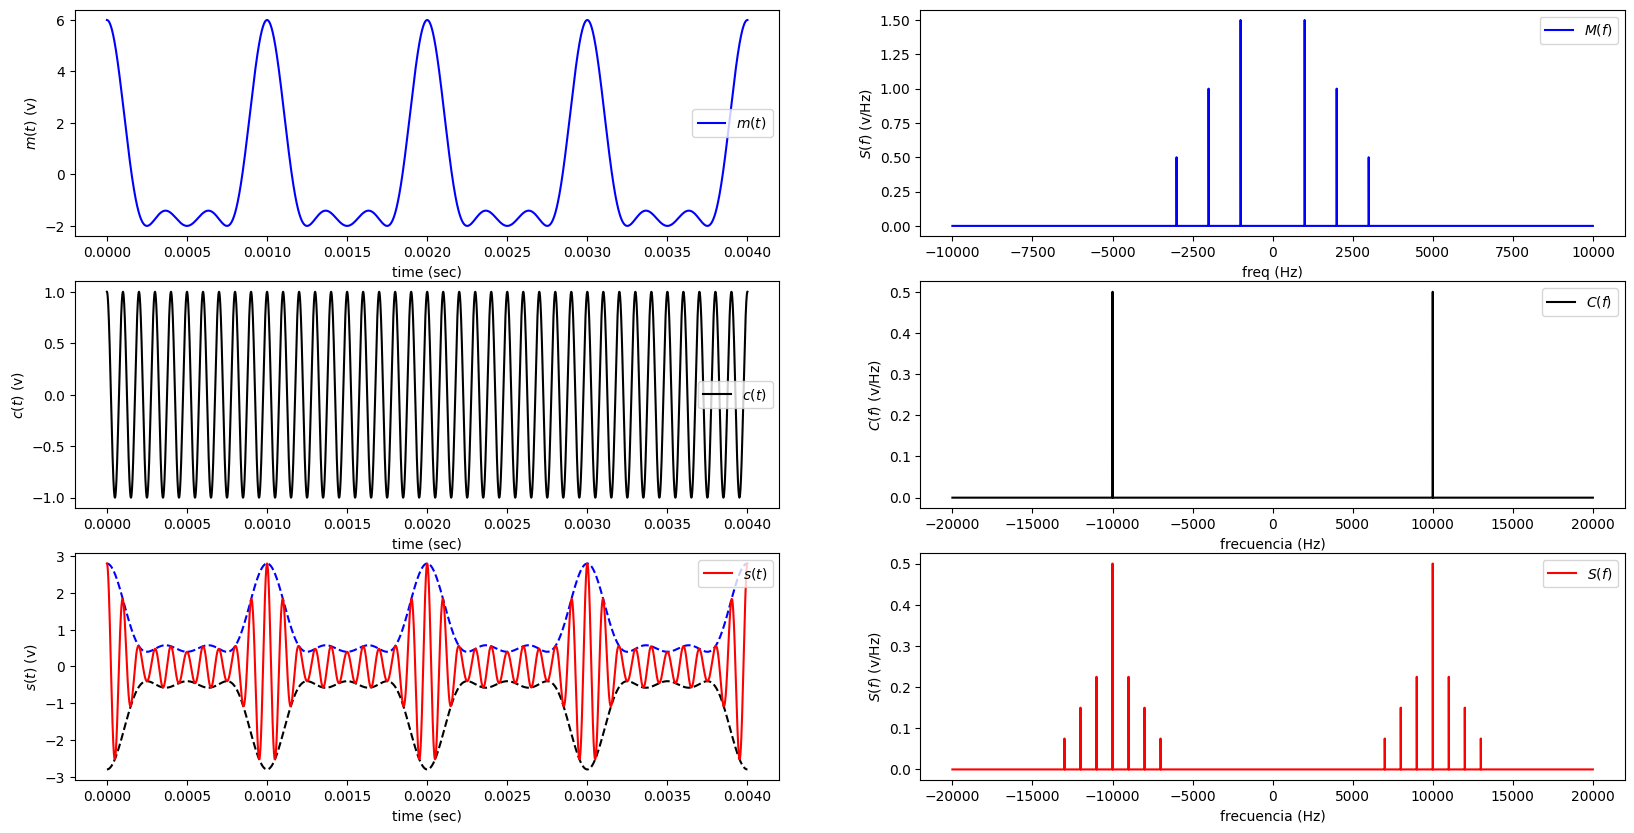

In [9]:
Am1= 3 # Amplitud de la componente 
fm1=1000 # Frecuencia de la componente 1

Am2= 2# Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1# Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

### Amplitudes de las componentes 
Como la señal enviada es una suma de cosenos al modificar al menos una de las tres amplitudes la señal va a ser deformada y dado que la misma es el límite de la onda modulada eso implica que resulte cambiada, presentado en la siguiente gráfica con una ampllitud de *1* en la componente 2:

<img src="AM componente 2.png" /> 

Al tener en la señal enviada tres cosenos sumados, su espectro resultante son impulsos de cada uno, resultado 6 impulsos 3 de cada lado los cuales también varían su amplitud, tanto en la señal mensaje como en la modulada. Como se puede observar con mayor detalle en la siguiente imagen cuando la amplitud de la componente 1 es de *0.5*

<img src="AM componente 1.png" /> 



### Frecuencias de las componentes 
En el mismo caso de las amplitudes, al variar la frecuencia de una sola componente se ve afectada toda la señal. Como se puede observar en la siguiente gráfica con *500 Hz* en la componente 1.

<img src="FM componente 1.png" />

El espectro de la señal cambia en la posición que se encuentra en el tiempo dado que la frecuencia esta directamente relacionada con el tiempo, en este caso con *5000 Hz* en la componente 3 se puede ver que a mayor frecuencia la señal vista es mucho más clara debido a que se encuentra más espaciada entre sí.

<img src="FM componente 3.png" />


### Amplitud de la señal portadora 
En el caso de la señal compuesta ocurre lo mismo que en una señal mensaje de un solo coseno, es decir; la amplitud de la señal portadora varía en la amplitud de la onda mensaje y en su espectro como se muestra en la siguiente gráfica con una amplitud de *3*.

<img src="AC 1 mayor.png" /> 


### Frecuencia de la señal portadora 
A mayor frecuencia de la onda portadora, más corta es la distancia entre cada máximo y pasa más información en menor tiempo. Caso contrario si se disminuye la frecuencia como en el siguiente caso con una frecuencia de *5000 Hz*. Además, cambia la posición en el espectro como ocurriría en cualquier señal.

<img src="FC 1 menor.png" /> 


## Conclusiones 
En este procedimiento se realizó la modulación de una señal senoidal en la cual se logró observar tanto en el dominio del tiempo como en el dominio de la frecuencia; siendo este el espectro de la señal. Con la variación de parámetros se determinó que la amplitud de la señal mensaje es la que asigna la forma a la señal modulada, así como que la frecuencia de la señal portadora es la que lleva la modulada y entre mayor sea la misma más información va a ser transmitida, por lo cual esos son los valores más importantes a tomar en cuenta en la modulación.

Además, el coeficiente de sensibilidad de la amplitud afecta directamente la señal modulada, en el caso de los espectros son variados tanto en su posición como en su amplitud independientemente de si la modificación se realiza en la señal mensaje o portadora porque el espectro de la modulada requiere de ambas para ser determinado. 

Para el caso del índice de modulación en cuanto mayor sea el mismo, la señal modulada más cambios tendrá siendo acorde a lo esperado, porque el índice mide la variación de la modulación. Así como, en el caso de una señal compuesta de varios cosenos la variación de frecuencias y amplitudes resulta ser la misma que para una señal simple. Finalmente, la modulación es uno de los procesos más importantes en la transmisión de señales siendo utilizados desde su descubrimiento hasta la actualidad, esto debido a que tiene grandes usos como transmitir música, programas de radio y comunicación militar. 

## Bibliografía 
Coto M, Rojas J, 2023, *Señales y sistemas para Ingeniería Eléctrica*